In [89]:
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [117]:
data_set = 'rebel10'
sf_data = gl.SFrame.read_csv(data_set+'.csv')

PROGRESS: Finished parsing file /home/devin/Capstone/rebel10.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.010467 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Read 9659 lines. Lines per second: 1.06871e+06
PROGRESS: Finished parsing file /home/devin/Capstone/rebel10.csv
PROGRESS: Parsing completed. Parsed 9659 lines in 0.009141 secs.


In [111]:
df_obs = pd.read_csv(data_set+'_observed_features.csv')
df_obs.head()

,Climb,location,rating,rating_dif,star_votes,stars,sub_location,type
0,105718186,Utah,21.0,1,154,4.9,Zion National Park,Trad
1,105741011,Idaho,14.5,0,164,3.8,City of Rocks,Trad
2,105741116,Utah,24.0,0,101,4.1,Maple Canyon,Sport
3,105959353,New Hampshire,22.0,0,106,3.9,Rumney,Sport
4,105804868,New York,13.0,0,75,3.6,The Gunks,Trad


In [112]:
m_ob = []
mse_scores_ob = []
n=3
for i in range(n):
    (train_set, test_set) = sf_data.random_split(0.8)
    
    #No observed item features for comparison
    m_ob += [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                        verbose = False,
                                        max_iterations=500000, num_factors=5, 
                                        regularization=0.001)]
    #Iterate through each observed item feature
    for col in df_obs.columns[1:]:
        df_ob = pd.concat( (df_obs.Climb, df_obs[col]) , axis=1)
        sf_ob = gl.SFrame(df_ob)
        m_ob += [gl.factorization_recommender.create(train_set, 'User', 'Climb', 'rating',
                                        item_data = sf_ob,
                                        verbose = False,
                                        max_iterations=500000, num_factors=5, 
                                        regularization=0.001)]


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys trainin

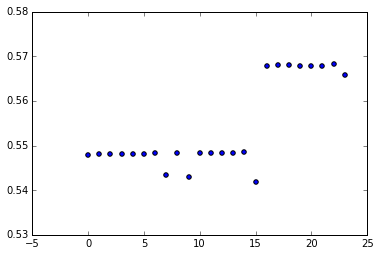

In [113]:
mse_scores_ob = [gl.evaluation.rmse(test_set['rating'], mod.predict(test_set))
                  for mod in m_ob]
zip(list(df_obs.columns)*n,mse_scores_ob)
plt.scatter(range(len(mse_scores_ob)),mse_scores_ob)

In [115]:
df_obs.columns

Index([u'Climb', u'location', u'rating', u'rating_dif', u'star_votes',
       u'stars', u'sub_location', u'type'],
      dtype='object')

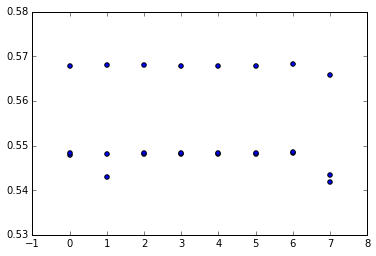

In [116]:
mse_scores_ob = [gl.evaluation.rmse(test_set['rating'], mod.predict(test_set))
                  for mod in m_ob]
plt.scatter(range(len(df_obs.columns))*n,mse_scores_ob)

##Add in useful observed features (all)

In [104]:
n_obs = 10

sf_obs = gl.SFrame(df_obs)
m_obs = []
for i in range(n_obs):
    (train_set, test_set) = sf_data.random_split(0.8)
    m_obs += [gl.factorization_recommender.create(train_set, 
                                        'User', 'Climb', 'rating',
                                        item_data = sf_obs,
                                        verbose = False,
                                        max_iterations=5000, 
                                        num_factors=5, 
                                        regularization=0.001)]

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Recsys training: model = factorization_recommender


In [105]:
mse_score_obs = [gl.evaluation.rmse(test_set['rating'],
                                   m.predict(test_set))
                 for m in m_obs]
mse_score_obs

[0.5471100904188786,
 0.5397351760990763,
 0.5426794803304136,
 0.5422160590902523,
 0.5388674571487642,
 0.5421792878528443,
 0.5479082076822741,
 0.542505972737443,
 0.5407021118607626,
 0.6687215060327019]

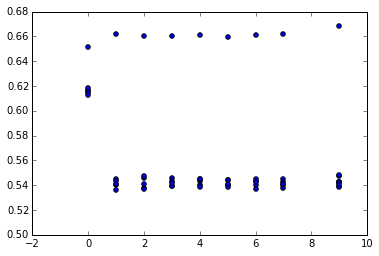

In [108]:
plt.scatter(range(len(df_obs.columns))*n,mse_scores_ob)
plt.scatter([len(df_obs.columns)+1]*n_obs, mse_score_obs)

##Scratchwork

In [31]:
df_test = pd.concat((df_obs['Climb'], df_obs['location']),axis=1)

In [58]:
sf_climb_obs = gl.SFrame(df_test)
sf_climb_obs.print_rows(4)

+-----------+---------------+
|   Climb   |    location   |
+-----------+---------------+
| 105718186 |      Utah     |
| 105741011 |     Idaho     |
| 105741116 |      Utah     |
| 105959353 | New Hampshire |
+-----------+---------------+
[940 rows x 2 columns]



In [57]:
item_info = gl.SFrame({'item_id': ["a", "b", "c", "d"],
                              'name': ["item1", "item2", "item3", "item4"],
                         'dict_feature': [{'a' : 23}, {'a' : 13},
                                               {'b' : 1},
                                               {'a' : 23, 'b' : 32}]})
item_info

dict_feature,item_id,name
{'a': 23},a,item1
{'a': 13},b,item2
{'b': 1},c,item3
"{'a': 23, 'b': 32}",d,item4
